In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Cleaning "Deliv_VEH.csv"

In [2]:
veh_df = pd.read_csv('Deliv_VEH.csv')

In [3]:
def drop_high_missing_columns(df, threshold=90):
    """
    Drops columns from the DataFrame that have a percentage of missing values greater than the specified threshold.

    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        threshold (float): The percentage threshold above which columns will be dropped (default: 90).

    Returns:
        pd.DataFrame: The modified DataFrame with high-missing-value columns removed.
        list: A list of columns that were dropped.
    """
    # Calculate the percentage of missing values
    missing_percentage = df.isnull().mean() * 100
    
    # Identify columns exceeding the threshold
    columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
    
    # Drop identified columns
    modified_df = df.drop(columns=columns_to_drop)
    
    # Output details
    print("Columns dropped (more than {}% missing values):".format(threshold))
    print(columns_to_drop)
    print("# of columns dropped: {}".format(len(columns_to_drop)))
    
    return modified_df, columns_to_drop

In [4]:
veh_df, dropped_columns = drop_high_missing_columns(veh_df)

Columns dropped (more than 90% missing values):
['O_BODY', 'FUELT2', 'FUELT3', 'FUELT4', 'FUELT5', 'FUELT6', 'O_FUELT', 'CIGLT', 'O_VEHOWN', 'O_VEHDRT', 'O_VEHCYL', 'O_WYCNTV']
# of columns dropped: 12


In [5]:
veh_df.head()

,SAMPN,VEHNO,YEAR,BODY,FUELT1,VEHAQ,VEHOWN,VEHINS,VEHOBD,VEHTRN,VEHDRT,VEHCYL,VEHOUT,VEHVLT,VEHT,CNTV,WYCNTV,HHWGT,EXPHHWGT
0,1031985,1,2006,1,1.0,2,1,2.0,NaN,1.0,2.0,4.0,10.0,1.0,2,1,NaN,0.059024,17.295257
1,1031985,2,1987,5,1.0,2,1,1.0,2.0,9.0,9.0,99.0,9999.0,NaN,2,2,99.0,0.059024,17.295257
2,1032036,1,2007,8,1.0,1,1,2.0,NaN,1.0,1.0,4.0,8.0,1.0,2,1,NaN,1.873466,548.964672
3,1032053,1,2001,1,1.0,2,1,9.0,9.0,1.0,1.0,2.0,NaN,NaN,2,1,NaN,0.055376,16.226415
4,1032053,2,2003,2,1.0,2,1,9.0,9.0,1.0,3.0,5.0,NaN,NaN,2,1,NaN,0.055376,16.226415


Now, let's convert the column names into more understandable names from the data dictionary we've created earlier.

In [6]:
def rename_columns_from_file(df, mapping_file, sheet_name="Sheet1", old_col_name="Column Name", new_col_name="Description"):
    """
    Renames the columns of a DataFrame based on a mapping stored in an Excel file.

    Parameters:
        df (pd.DataFrame): The DataFrame whose columns need to be renamed.
        mapping_file (str): Path to the Excel file containing the mapping.
        sheet_name (str): Name of the sheet in the Excel file (default is "Sheet1").
        old_col_name (str): Column in the file with the current column names (default is "Column Name").
        new_col_name (str): Column in the file with the new column names (default is "Description").

    Returns:
        pd.DataFrame: A DataFrame with renamed columns.
    """
    # Load the mapping from the Excel file
    mapping_df = pd.read_excel(mapping_file, sheet_name=sheet_name)
    
    # Create a dictionary for mapping
    column_mapping = mapping_df.set_index(old_col_name)[new_col_name].to_dict()
    
    # Rename the columns in the DataFrame
    df = df.rename(columns=column_mapping)
    return df

In [7]:
mapping_file = "raw_data_dic.xlsx"

veh_df = rename_columns_from_file(veh_df, mapping_file)

# Rename 'old_name' to 'new_name'
veh_df = veh_df.rename(columns={'Year of trip data': 'Year of vehicle',
                                'Vehicle acquisition date': 'Vehicle acquired',
                                'Vehicle count': 'was vehicle used on travel day',
                                'Weighted vehicle count': 'reason why not'})

# Check the updated column names
print(veh_df.columns)

Index(['Household identifier', 'Vehicle identifier', 'Year of vehicle',
       'Vehicle body type', 'Primary fuel type', 'Vehicle acquired',
       'Vehicle ownership type', 'Vehicle insurance status',
       'Vehicle onboard diagnostic indicator', 'Vehicle transmission type',
       'Vehicle drive type', 'Vehicle cylinder count',
       'Vehicle out of service indicator', 'Vehicle voltage indicator',
       'Vehicle type', 'was vehicle used on travel day', 'reason why not',
       'Household weight factor', 'Expanded household weight factor'],
      dtype='object')


### Rationale for Dropping Specific Columns

We are dropping the following columns to streamline the dataset while retaining the most relevant information for analysis:

1. **Household weight factor**: This column adjusts for reporting discrepancies, but it is not directly required for modeling or analysis since the adjusted weights already account for these factors.
2. **Expanded household weight**: A scaled version of the household weight (`Household weight`), which is not needed.

By removing these columns, we simplify the dataset without losing the critical attributes needed for robust modeling and analysis. This helps focus on key insights while reducing complexity. 

In [8]:
# List of columns to drop
columns_to_drop = [
    'Household weight factor', 
    'Expanded household weight factor'
]

# Drop the columns from the DataFrame
filtered_df = veh_df.drop(columns=columns_to_drop)

In [9]:
filtered_df.head()

,Household identifier,Vehicle identifier,Year of vehicle,Vehicle body type,Primary fuel type,Vehicle acquired,Vehicle ownership type,Vehicle insurance status,Vehicle onboard diagnostic indicator,Vehicle transmission type,Vehicle drive type,Vehicle cylinder count,Vehicle out of service indicator,Vehicle voltage indicator,Vehicle type,was vehicle used on travel day,reason why not
0,1031985,1,2006,1,1.0,2,1,2.0,NaN,1.0,2.0,4.0,10.0,1.0,2,1,NaN
1,1031985,2,1987,5,1.0,2,1,1.0,2.0,9.0,9.0,99.0,9999.0,NaN,2,2,99.0
2,1032036,1,2007,8,1.0,1,1,2.0,NaN,1.0,1.0,4.0,8.0,1.0,2,1,NaN
3,1032053,1,2001,1,1.0,2,1,9.0,9.0,1.0,1.0,2.0,NaN,NaN,2,1,NaN
4,1032053,2,2003,2,1.0,2,1,9.0,9.0,1.0,3.0,5.0,NaN,NaN,2,1,NaN


<Axes: >

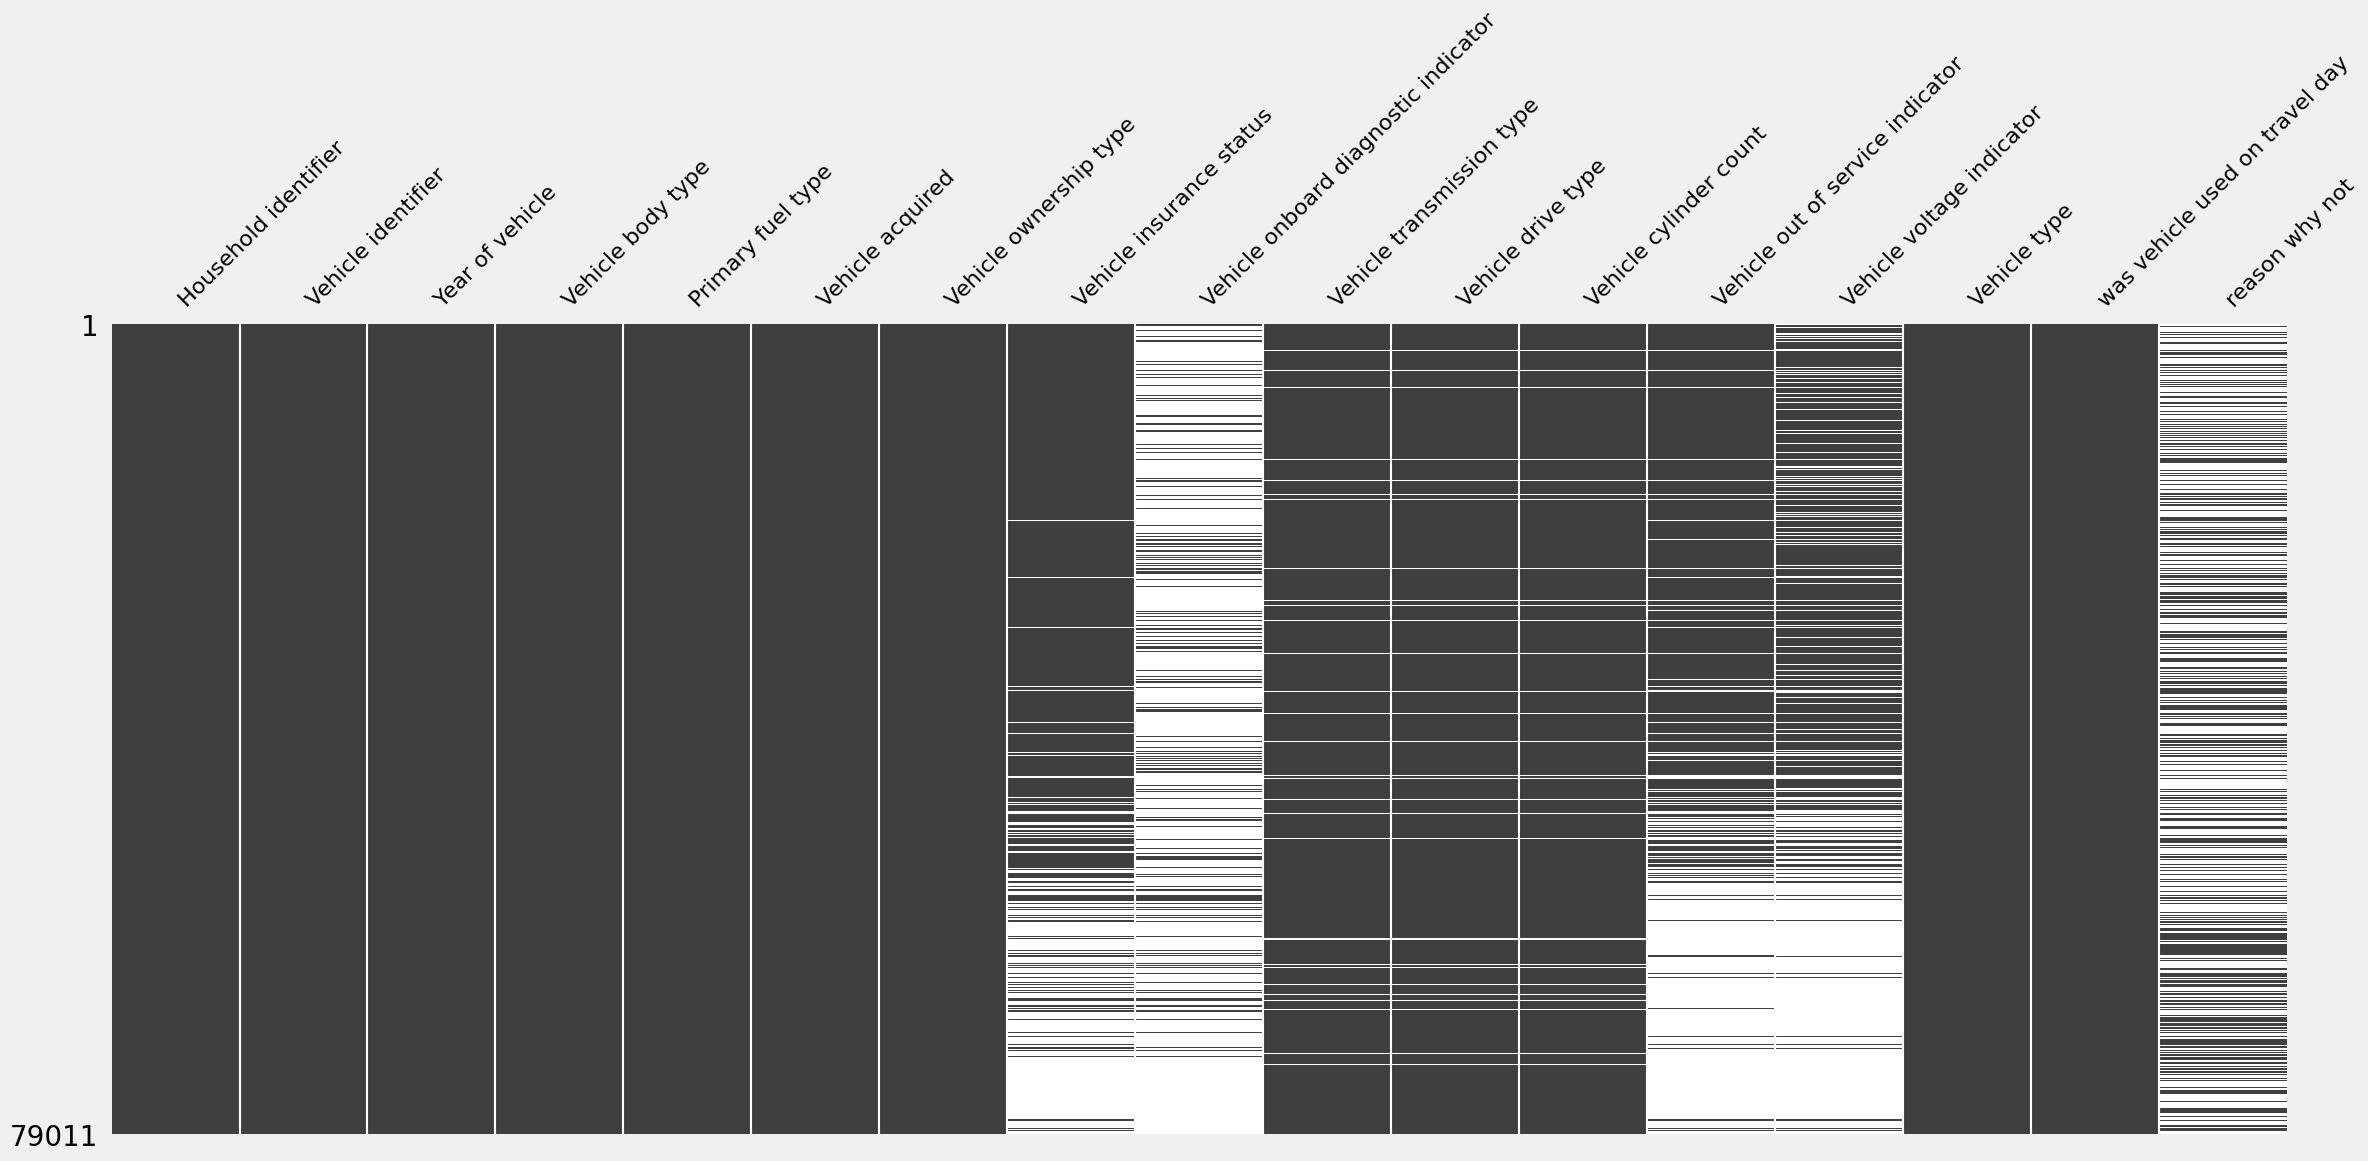

In [10]:
import missingno as msno
msno.matrix(filtered_df, sparkline=False)

From the graph above we see that some columns have a lot of missing values. We will trop these columns entirely as they do not provide insgihtful information anyway.

In [11]:
columns_to_drop = [
    'Vehicle insurance status',
    'Vehicle onboard diagnostic indicator', 
    'Vehicle out of service indicator',
    'Vehicle voltage indicator',
]

filtered_df = filtered_df.drop(columns=columns_to_drop)

In [12]:
# Create a new column 'hh_veh_id' by merging 'Household identifier' and 'Vehicle identifier'
filtered_df['hh_veh_id'] = filtered_df['Household identifier'].astype(str) + '_' + filtered_df['Vehicle identifier'].astype(str)

filtered_df = filtered_df.drop(columns=['Household identifier', 'Vehicle identifier'])

# Reorder columns to make 'hh_veh_id' the first column
filtered_df = filtered_df[['hh_veh_id'] + [col for col in filtered_df.columns if col != 'hh_veh_id']]

In [13]:
# Display remaining columns to confirm the result
print("Remaining columns in the DataFrame:")
print(filtered_df.columns)

Remaining columns in the DataFrame:
Index(['hh_veh_id', 'Year of vehicle', 'Vehicle body type',
       'Primary fuel type', 'Vehicle acquired', 'Vehicle ownership type',
       'Vehicle transmission type', 'Vehicle drive type',
       'Vehicle cylinder count', 'Vehicle type',
       'was vehicle used on travel day', 'reason why not'],
      dtype='object')


In [14]:
filtered_df.head()

,hh_veh_id,Year of vehicle,Vehicle body type,Primary fuel type,Vehicle acquired,Vehicle ownership type,Vehicle transmission type,Vehicle drive type,Vehicle cylinder count,Vehicle type,was vehicle used on travel day,reason why not
0,1031985_1,2006,1,1.0,2,1,1.0,2.0,4.0,2,1,NaN
1,1031985_2,1987,5,1.0,2,1,9.0,9.0,99.0,2,2,99.0
2,1032036_1,2007,8,1.0,1,1,1.0,1.0,4.0,2,1,NaN
3,1032053_1,2001,1,1.0,2,1,1.0,1.0,2.0,2,1,NaN
4,1032053_2,2003,2,1.0,2,1,1.0,3.0,5.0,2,1,NaN


We need to replace the rows that have 9998: Don't Know or 9999: Refussed to share by NaN. This mostly applies to year

In [15]:
filtered_df = filtered_df.replace([9998, 9999], np.nan)

We also want to replace all the Don't Know and Refuse values in all the columns by NaN but their assigned value varies per column. We will have to do it one by one.

In [16]:
# Replace the 'other', 'DK' and 'RF' values in the body type column by NaN.
filtered_df['Vehicle body type'] = filtered_df['Vehicle body type'].replace([97, 98, 99], np.nan)

# Replace the 'other', 'DK' and 'RF' values in the fuel type column by NaN.
filtered_df['Primary fuel type'] = filtered_df['Primary fuel type'].replace([7, 8, 9], np.nan)

# Replace the 'DK' and 'RF' values in the Vehicle acquired column by NaN.
filtered_df['Vehicle acquired'] = filtered_df['Vehicle acquired'].replace([8, 9], np.nan)

# Replace the 'other', 'DK' and 'RF' values in the Vehicle ownership type column by NaN.
filtered_df['Vehicle ownership type'] = filtered_df['Vehicle ownership type'].replace([7, 8, 9], np.nan)

# Replace the 'DK' and 'RF' values in the Vehicle transmission type column by NaN.
filtered_df['Vehicle transmission type'] = filtered_df['Vehicle transmission type'].replace([8, 9], np.nan)

# Replace the 'other', 'DK' and 'RF' values in the Vehicle drive type column by NaN.
filtered_df['Vehicle drive type'] = filtered_df['Vehicle drive type'].replace([7, 8, 9], np.nan)

# Replace the 'other', 'DK' and 'RF' values in the Vehicle cylinder count column by NaN.
filtered_df['Vehicle cylinder count'] = filtered_df['Vehicle cylinder count'].replace([97, 98, 99], np.nan)

# Replace the 'other', 'DK' and 'RF' values in the Vehicle type column by NaN.
filtered_df['Vehicle type'] = filtered_df['Vehicle type'].replace([7, 8, 9], np.nan)

# Replace the 'other', 'DK' and 'RF' values in the reaosn why not column by NaN.
filtered_df['reason why not'] = filtered_df['reason why not'].replace([97, 98, 99], np.nan)


In [18]:
filtered_df.to_csv('cleaned_veh_df.csv')